# Video game Dataset

Import main libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Warnings and max_columns

In [10]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
pd.options.display.max_columns=None

Read the CSV

In [11]:
df = pd.read_csv(r'C:\Users\Javi\Documents\GitHub\Video_game_rep\Data\videogames_dataset.csv')

DataFrame

In [12]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales,EurpeanUnion_Sales,Japan_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,12.88,3.79,NaN,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,NaN,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
194,220,FIFA 15,PS3,2014,Sports,Electronic Arts,0.57,3.14,0.04,1.07,4.82
195,221,Crash Team Racing,PS,1999,Racing,Sony Computer Entertainment,2.57,1.57,0.44,0.21,4.79
196,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
197,223,Batman: Arkham City,X360,2011,Action,Warner Bros. Interactive Entertainment,2.99,1.31,0.04,0.41,4.76


Basic info

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                199 non-null    int64  
 1   Name                199 non-null    object 
 2   Platform            199 non-null    object 
 3   Year                199 non-null    int64  
 4   Genre               199 non-null    object 
 5   Publisher           199 non-null    object 
 6   NorthAmerica_Sales  185 non-null    float64
 7   EurpeanUnion_Sales  190 non-null    float64
 8   Japan_Sales         189 non-null    float64
 9   Other_Sales         192 non-null    float64
 10  Global_Sales        187 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,199.0,110.075377,64.928627,1.00,55.5000,107.00,163.5000,224.00
Year,199.0,2005.201005,7.452869,1982.00,1999.0000,2007.00,2011.0000,2016.00
NorthAmerica_Sales,185.0,4.701189,4.800238,0.00,2.5900,3.28,5.1700,41.49
EurpeanUnion_Sales,190.0,3.046368,2.856300,0.00,1.6325,2.27,3.4700,29.02
Japan_Sales,189.0,1.342169,1.723777,0.00,0.0800,0.65,2.0200,10.22
Other_Sales,192.0,0.813490,0.852163,0.00,0.2975,0.63,1.0125,8.46
Global_Sales,187.0,9.861658,8.301009,4.76,5.4650,7.13,10.6300,82.74


We have some null values

In [33]:
df.isnull().sum()

Rank                   0
Name                   0
Platform               0
Year                   0
Genre                  0
Publisher              0
NorthAmerica_Sales    14
EurpeanUnion_Sales     9
Japan_Sales           10
Other_Sales            7
Global_Sales          12
dtype: int64

Lets clean nulls

1st Publisher

In [35]:
df['Publisher'].value_counts()

Nintendo                                  83
Activision                                23
Sony Computer Entertainment               17
Microsoft Game Studios                    15
Electronic Arts                           12
Take-Two Interactive                      10
Ubisoft                                    9
Bethesda Softworks                         4
Capcom                                     4
Sega                                       3
LucasArts                                  2
Eidos Interactive                          2
Warner Bros. Interactive Entertainment     2
Virgin Interactive                         2
505 Games                                  2
Konami Digital Entertainment               2
SquareSoft                                 2
Sony Computer Entertainment Europe         1
GT Interactive                             1
Atari                                      1
Square Enix                                1
Infogrames                                 1
Name: Publ

In [37]:
df.loc[198, 'Publisher'] = 'Infogrames'


This game came out for play station so with a quick search we find that the game was published by infogrames so we can fill this correctly

The rest of nulls are sales data so we will arrange this issue later

Lets's check the other columns

Rank has some rows missing, but is not a problem

In [22]:
df['Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  19,  20,  21,  22,  23,  24,  26,  27,  28,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  41,  42,  43,
        44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171,
       172, 173, 174, 176, 177, 178, 179, 182, 183, 186, 188, 189, 190,
       192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 20

<Axes: >

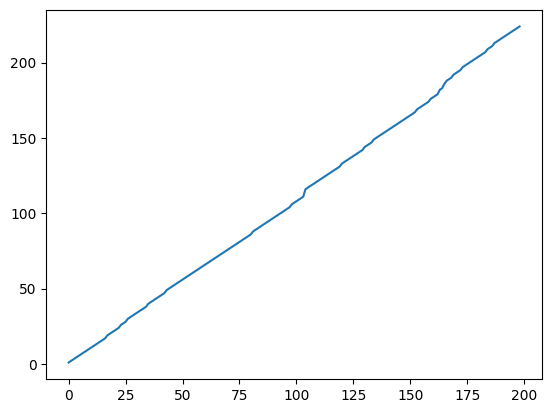

In [23]:
sns.lineplot(df['Rank'].unique())

Platform

In [40]:
df['Platform'].value_counts()

PS3     31
X360    30
Wii     21
DS      20
PS      20
GB      11
PS4      9
3DS      8
N64      8
GBA      7
NES      7
SNES     6
PC       5
PSP      4
XOne     3
GC       3
XB       2
WiiU     2
2600     1
GEN      1
Name: Platform, dtype: int64

In [51]:
df[df['Platform'] == 'GB']

,Rank,Name,Platform,Year,Genre,Publisher,NorthAmerica_Sales,EurpeanUnion_Sales,Japan_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,NaN
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,NaN,6.18,7.20,0.71,23.10
20,22,Super Mario Land,GB,1989,Platform,Nintendo,NaN,2.71,4.18,0.42,18.14
27,31,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
45,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
120,133,Pokémon Crystal Version,GB,2000,Role-Playing,Nintendo,2.55,1.56,1.29,0.99,6.39
155,171,Dr. Mario,GB,1989,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
156,172,Pokemon Pinball,GB,1999,Misc,Nintendo,3.02,1.12,1.01,NaN,5.31
169,192,Kirby's Dream Land,GB,1992,Platform,Nintendo,2.71,0.61,1.70,0.11,5.13


We create another df to keep clean the original

In [67]:
df_copy = pd.DataFrame(df)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()
df_copy['Platform'] = le.fit_transform(df_copy['Platform'])

In [75]:
df_copy['Platform'].value_counts()

11    31
17    30
15    21
2     20
10    20
3     11
12     9
1      8
7      8
4      7
8      7
14     6
9      5
13     4
19     3
5      3
18     2
16     2
0      1
6      1
Name: Platform, dtype: int64

In [112]:
fig = px.histogram(df, 
                   x = 'Year',
                   marginal='box',
                   nbins=50,
                   title= 'Year distributión of game published')




fig.show()
